In [1]:
#Import Environments:

import pandas as pd
import numpy as np

In [2]:
#Load Data:

train = pd.read_excel (r'C:\Users\nvhuy\Desktop\test_data.xlsx')
test  = pd.read_excel (r'C:\Users\nvhuy\Desktop\test_data.xlsx')

In [3]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Data columns (total 20 columns):
YEAR                  4997 non-null int64
QUARTER               4997 non-null int64
MONTH                 4997 non-null int64
DAY_OF_MONTH          4997 non-null int64
DAY_OF_WEEK           4997 non-null int64
ORIGIN                4997 non-null object
DEST                  4997 non-null object
CRS_DEP_TIME          4997 non-null int64
DEP_TIME              4997 non-null int64
DEP_DELAY             4997 non-null int64
DEP_DEL15             4997 non-null int64
CRS_ARR_TIME          4997 non-null int64
ARR_TIME              4997 non-null int64
ARR_DELAY             4997 non-null int64
ARR_DEL15             4997 non-null int64
CRS_ELAPSED_TIME      4997 non-null int64
DISTANCE              4997 non-null int64
CRS_ELAPSED_TIME.1    150 non-null float64
FLIGHTS               150 non-null float64
DISTANCE.1            150 non-null float64
dtypes: float64(3), int64(15), object(2)
memory 

(None, None)

In [4]:
train.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
ORIGIN                   0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME                 0
DEP_DELAY                0
DEP_DEL15                0
CRS_ARR_TIME             0
ARR_TIME                 0
ARR_DELAY                0
ARR_DEL15                0
CRS_ELAPSED_TIME         0
DISTANCE                 0
CRS_ELAPSED_TIME.1    4847
FLIGHTS               4847
DISTANCE.1            4847
dtype: int64

In [5]:
train.set_index("CRS_DEP_TIME", inplace=True)
test.set_index("CRS_DEP_TIME", inplace=True)

In [6]:
train_y = train["ARR_DEL15"]

In [7]:
#Delete the column ARR_DEL15 from train set:

train.drop(labels="ARR_DEL15", axis=1, inplace=True)

In [8]:
train.shape, test.shape

((4997, 18), (4997, 19))

In [9]:
train_test = train.append(test)

C:\Users\nvhuy\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [10]:
#Delete columns that are not used as features for training and prediction:

columns_to_drop = ["ORIGIN", "DEST"]
train_test.drop(labels=columns_to_drop, axis=1, inplace=True)

In [11]:
#Replace NaN with zeroes:

train_test.fillna(value=0, inplace=True)

In [12]:
train_test.isnull().values.any()

False

In [13]:
#Generate feature sets (x):

train_x = train_test.values[0:4997]
test_x = train_test.values[4997:]

In [14]:
train_x.shape, test_x.shape

((4997, 17), (4997, 17))

In [15]:
#Transform the data:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_x_scale = scaler.fit_transform(train_x)
test_x_scale = scaler.transform(test_x)

In [16]:
#Split training feature and target sets into training and validation subsets:
from sklearn.model_selection import train_test_split

train_x_sub, validation_x_sub, train_y_sub, validation_y_sub = train_test_split(train_x_scale, train_y, random_state=0)

In [17]:
#Train with Gradient Boosting Algorithm:

from sklearn.ensemble import GradientBoostingClassifier

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gboost = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gboost.fit(train_x_sub, train_y_sub)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gboost.score(train_x_sub, train_y_sub)))
    print("Accuracy score (validation): {0:.3f}".format(gboost.score(validation_x_sub, validation_y_sub)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.941
Accuracy score (validation): 0.929

Learning rate:  0.1
Accuracy score (training): 0.978
Accuracy score (validation): 0.977

Learning rate:  0.25
Accuracy score (training): 0.996
Accuracy score (validation): 0.996

Learning rate:  0.5
Accuracy score (training): 0.999
Accuracy score (validation): 0.997

Learning rate:  0.75
Accuracy score (training): 0.998
Accuracy score (validation): 0.993

Learning rate:  1
Accuracy score (training): 0.991
Accuracy score (validation): 0.990



In [27]:
#Output confusion matrix and classification report of Gradient Boosting algorithm on validation set:

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

gboost = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gboost.fit(train_x_sub, train_y_sub)
predictions = gboost.predict(validation_x_sub)

print("Confusion Matrix:")
print(confusion_matrix(validation_y_sub, predictions))
print()
print("Classification Report:")
print(classification_report(validation_y_sub, predictions))

Confusion Matrix:
[[1140    4]
 [   0  106]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1144
           1       0.96      1.00      0.98       106

   micro avg       1.00      1.00      1.00      1250
   macro avg       0.98      1.00      0.99      1250
weighted avg       1.00      1.00      1.00      1250



In [28]:
import itertools
import matplotlib.pyplot as plt

Confusion matrix, without normalization
[[1140    4]
 [   0  106]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


<Figure size 432x288 with 0 Axes>

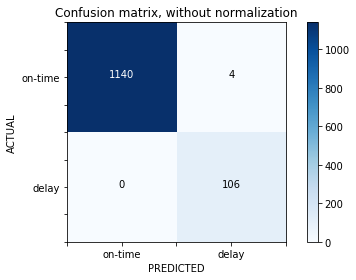

<Figure size 432x288 with 0 Axes>

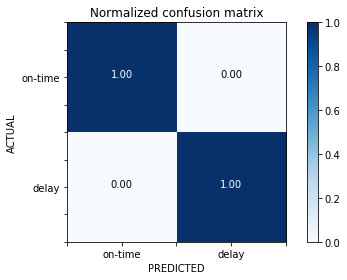

In [32]:
def plot_confusion_matrix(cm,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.ylabel('ACTUAL')
    plt.xlabel('PREDICTED')
    plt.tight_layout()
    plt.grid('off')
    x_labels = ['on-time','','delay']
    y_labels = ['','on-time','','','','delay']
    ax = fig.add_subplot(111)
    ax.set_xticklabels([' '] + x_labels)
    ax.set_yticklabels([' '] + y_labels)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    

# Compute confusion matrix
cnf_matrix = confusion_matrix(validation_y_sub, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True,
                      title='Normalized confusion matrix')


plt.show()

In [25]:
# ROC curve and Area-Under-Curve (AUC)

y_scores_gboost = gboost.decision_function(validation_x_sub)
fpr_gboost, tpr_gboost, _ = roc_curve(validation_y_sub, y_scores_gboost)
roc_auc_gboost = auc(fpr_gboost, tpr_gboost)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gboost))

Area under ROC curve = 1.00
